Objective:

The purpose of this notebook is to perform an exploratory data analysis (EDA) on a dataset containing crime reports from the city of San Francisco. The analysis aims to uncover patterns and insights related to the occurrence of crimes, including:

Frequency Analysis: Identifying the most common types of crimes, as well as understanding how crime incidents are distributed across different days of the week, times of the day, and police districts.

Geographical Analysis: Utilizing geospatial data to visualize crime hotspots within the city, helping to pinpoint areas with higher concentrations of criminal activity.

Temporal Analysis: Analyzing trends over time to detect any significant changes in crime rates across months and years.

Resolution Analysis: Exploring the outcomes of reported crimes, focusing on how they were resolved (e.g., arrests made, cases closed).

Textual Analysis: Investigating the descriptions of crimes to identify frequently occurring terms, which may provide additional context or reveal common characteristics across different crime categories.

This EDA will help to generate hypotheses, guide further investigations, and potentially inform public safety strategies or policy decisions. No predictive modeling will be conducted in this notebook; the focus is solely on descriptive and visual analytics.



In [43]:
import pandas as pd

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('crime.csv')

In [8]:
df

IncidntNum        Category  \
0        120058272     WEAPON LAWS   
1        120058272     WEAPON LAWS   
2        141059263        WARRANTS   
3        160013662    NON-CRIMINAL   
4        160002740    NON-CRIMINAL   
...            ...             ...   
150495   161061000         ASSAULT   
150496   176000742    NON-CRIMINAL   
150497   176000758   LARCENY/THEFT   
150498   176000764   LARCENY/THEFT   
150499   179002868  OTHER OFFENSES   

                                                 Descript DayOfWeek  \
0                               POSS OF PROHIBITED WEAPON    Friday   
1          FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE    Friday   
2                                          WARRANT ARREST    Monday   
3                                           LOST PROPERTY   Tuesday   
4                                           LOST PROPERTY    Friday   
...                                                   ...       ...   
150495                                            BATTERY    Friday   
150496                                      LOST PROPERTY    Friday   
150497                            PETTY THEFT OF PROPERTY  Thursday   
150498                            GRAND THEFT OF PROPERTY    Friday   
150499  FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...    Friday   

                          Date   Time  PdDistrict      Resolution  \
0       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2       04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3       01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4       01/01/2016 12:00:00 AM  00:30     MISSION            NONE   
...                        ...    ...         ...             ...   
150495  12/30/2016 12:00:00 AM  21:01        PARK            NONE   
150496  12/30/2016 12:00:00 AM  08:00     CENTRAL            NONE   
150497  12/29/2016 12:00:00 AM  20:00     CENTRAL            NONE   
150498  12/30/2016 12:00:00 AM  10:00     CENTRAL            NONE   
150499  12/02/2016 12:00:00 AM  14:00    SOUTHERN            NONE   

                         Address           X          Y  \
0         800 Block of BRYANT ST -122.403405  37.775421   
1         800 Block of BRYANT ST -122.403405  37.775421   
2          KEITH ST / SHAFTER AV -122.388856  37.729981   
3         JONES ST / OFARRELL ST -122.412971  37.785788   
4           16TH ST / MISSION ST -122.419672  37.765050   
...                          ...         ...        ...   
150495       OAK ST / STANYAN ST -122.453982  37.771428   
150496   JACKSON ST / SANSOME ST -122.401857  37.796626   
150497       PINE ST / TAYLOR ST -122.412269  37.790673   
150498  200 Block of STOCKTON ST -122.406659  37.788275   
150499    800 Block of BRYANT ST -122.403405  37.775421   

                                     Location            PdId  
0        (37.775420706711, -122.403404791479)  12005827212120  
1        (37.775420706711, -122.403404791479)  12005827212168  
2       (37.7299809672996, -122.388856204292)  14105926363010  
3       (37.7857883766888, -122.412970537591)  16001366271000  
4       (37.7650501214668, -122.419671780296)  16000274071000  
...                                       ...             ...  
150495  (37.7714278595913, -122.453981622365)  16106100004134  
150496  (37.7966261239618, -122.401857374739)  17600074271000  
150497   (37.7906727649886, -122.41226909106)  17600075806372  
150498  (37.7882745285785, -122.406658711008)  17600076406374  
150499   (37.775420706711, -122.403404791479)  17900286809024  

[150500 rows x 13 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   IncidntNum  150500 non-null  int64         
 1   Category    150500 non-null  object        
 2   Descript    150500 non-null  object        
 3   DayOfWeek   150500 non-null  object        
 4   Date        150500 non-null  datetime64[ns]
 5   Time        150500 non-null  object        
 6   PdDistrict  150499 non-null  object        
 7   Resolution  150500 non-null  object        
 8   Address     150500 non-null  object        
 9   X           150500 non-null  float64       
 10  Y           150500 non-null  float64       
 11  Location    150500 non-null  object        
 12  PdId        150500 non-null  int64         
 13  Hour        150500 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(8)
memory usage: 15.5+ MB


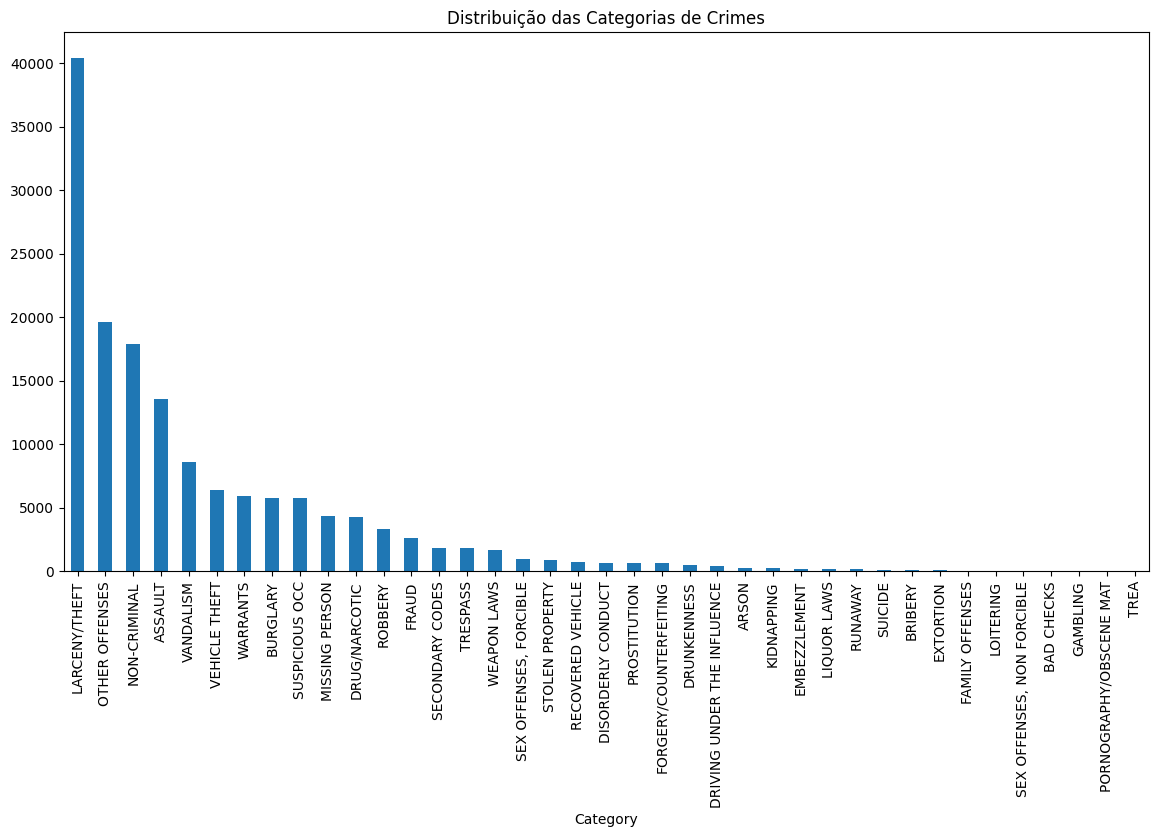

In [45]:
# Contagem de incidentes por categoria
df['Category'].value_counts().plot(kind='bar', figsize=(14,7), title='Distribuição das Categorias de Crimes');


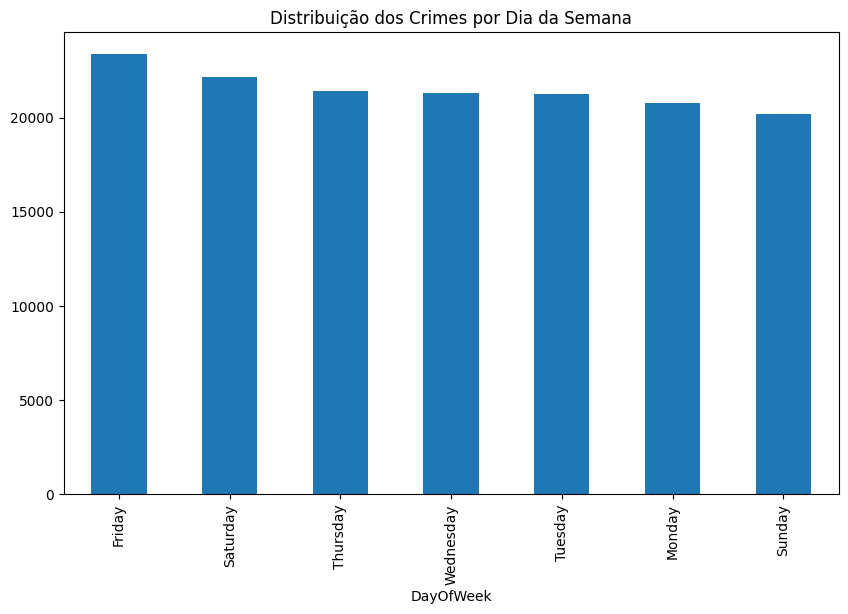

In [11]:
# Contagem de crimes por dia da semana
df['DayOfWeek'].value_counts().plot(kind='bar', figsize=(10,6), title='Distribuição dos Crimes por Dia da Semana');


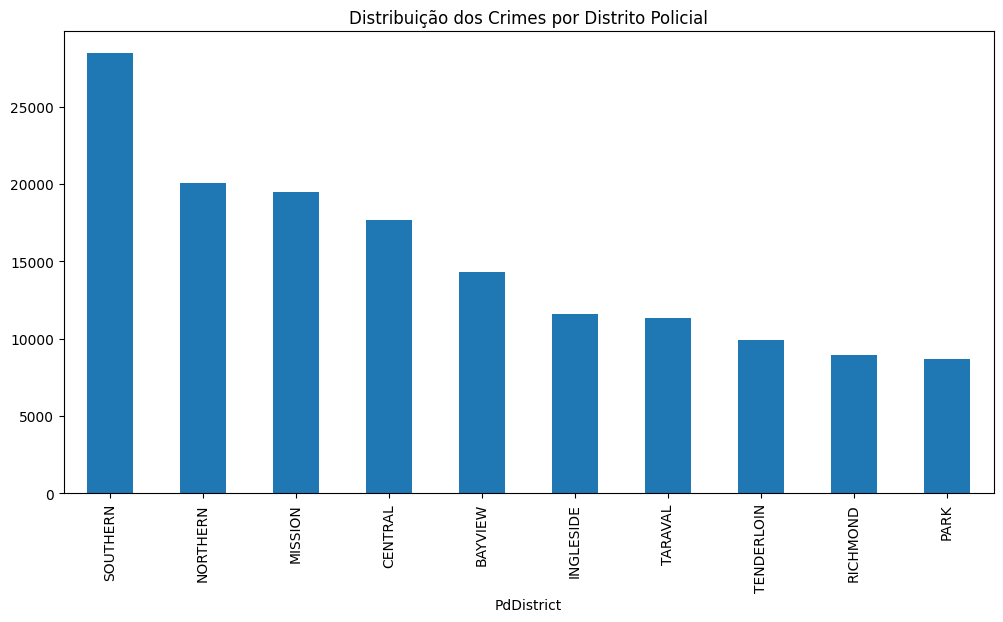

In [58]:
# Crimes per District
df['PdDistrict'].value_counts().plot(kind='bar', figsize=(12,6), title='Distribuição dos Crimes por Distrito Policial');

In [51]:
district_counts = df['PdDistrict'].value_counts()
district_counts_df = district_counts.reset_index()
district_counts_df.columns = ['PdDistrict', 'Count']
district_counts_df


PdDistrict  Count
0    SOUTHERN  28445
1    NORTHERN  20100
2     MISSION  19503
3     CENTRAL  17666
4     BAYVIEW  14303
5   INGLESIDE  11594
6     TARAVAL  11325
7  TENDERLOIN   9942
8    RICHMOND   8922
9        PARK   8699

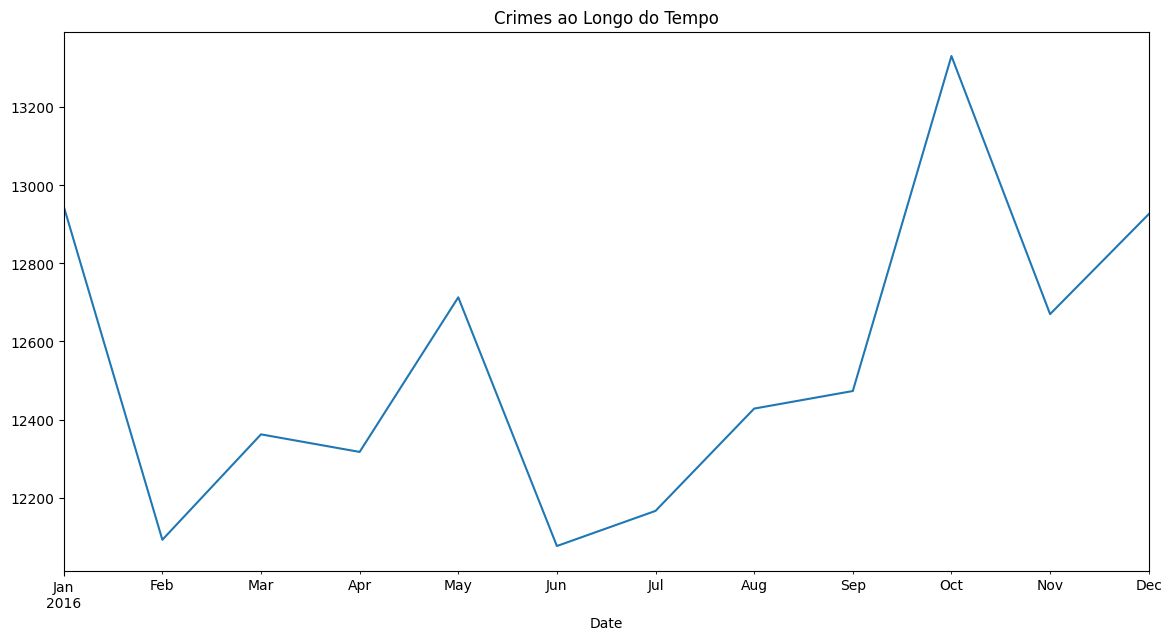

In [57]:
# Crimes per month
df['Date'] = pd.to_datetime(df['Date'])


df['Date'].groupby(df['Date'].dt.to_period("M")).count().plot(kind='line', figsize=(14,7), title='Crimes ao Longo do Tempo');


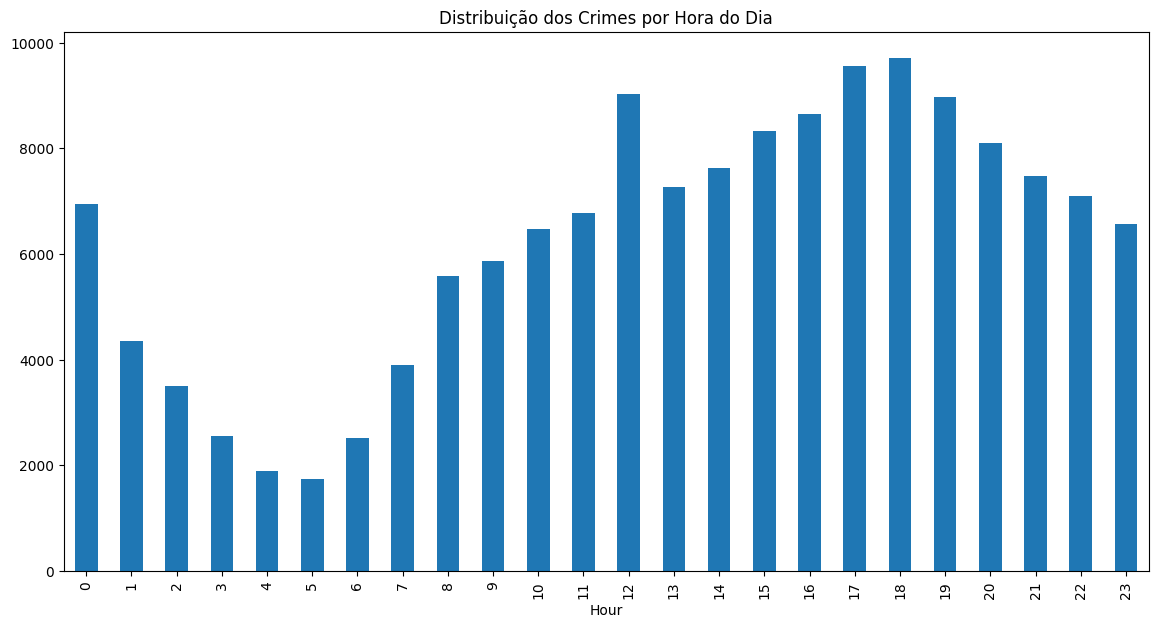

In [17]:
# Converter a coluna 'Time' para datetime (apenas a hora)
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Plotar a distribuição dos crimes por hora do dia
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(14,7), title='Distribuição dos Crimes por Hora do Dia');


<Axes: xlabel='Hour', ylabel='DayOfWeek'>

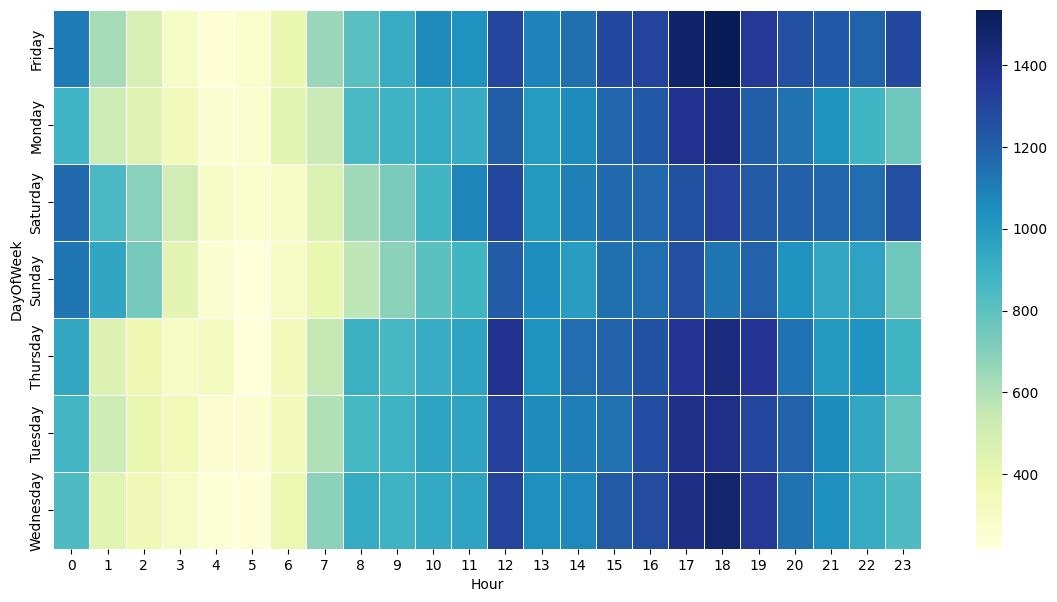

In [19]:
# Configurar o tamanho da figura
plt.figure(figsize=(14, 7))

# Criar o heatmap
sns.heatmap(crimes_per_day_hour, cmap='YlGnBu', linewidths=.5)



In [46]:
import folium
from folium.plugins import HeatMap

# Mapa base centrado em San Francisco
map_sf = folium.Map(location=[37.77, -122.42], zoom_start=12)

# Heatmap ao mapa
HeatMap(data=df[['Y', 'X']].values, radius=10).add_to(map_sf)
map_sf


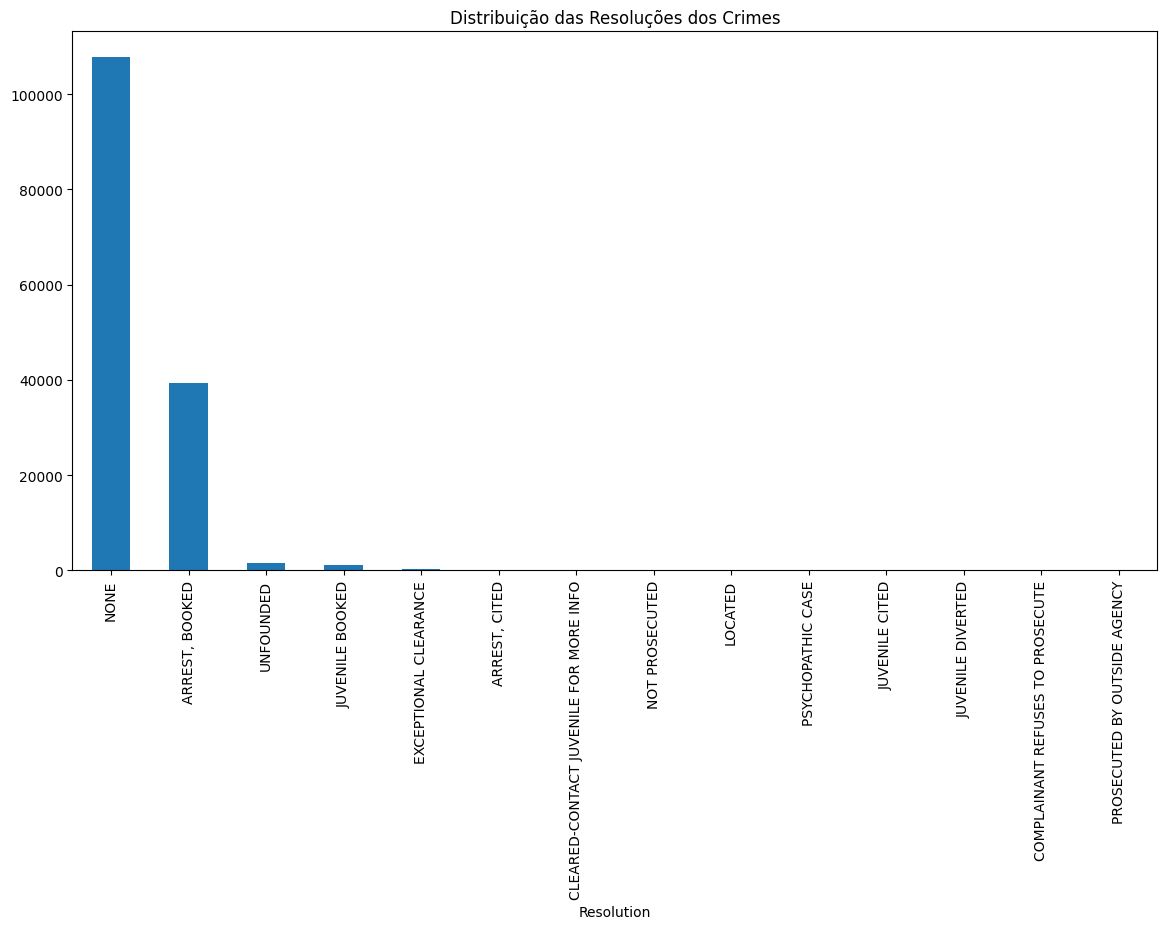

In [24]:
# Contagem de resoluções
df['Resolution'].value_counts().plot(kind='bar', figsize=(14,7), title='Distribuição das Resoluções dos Crimes');


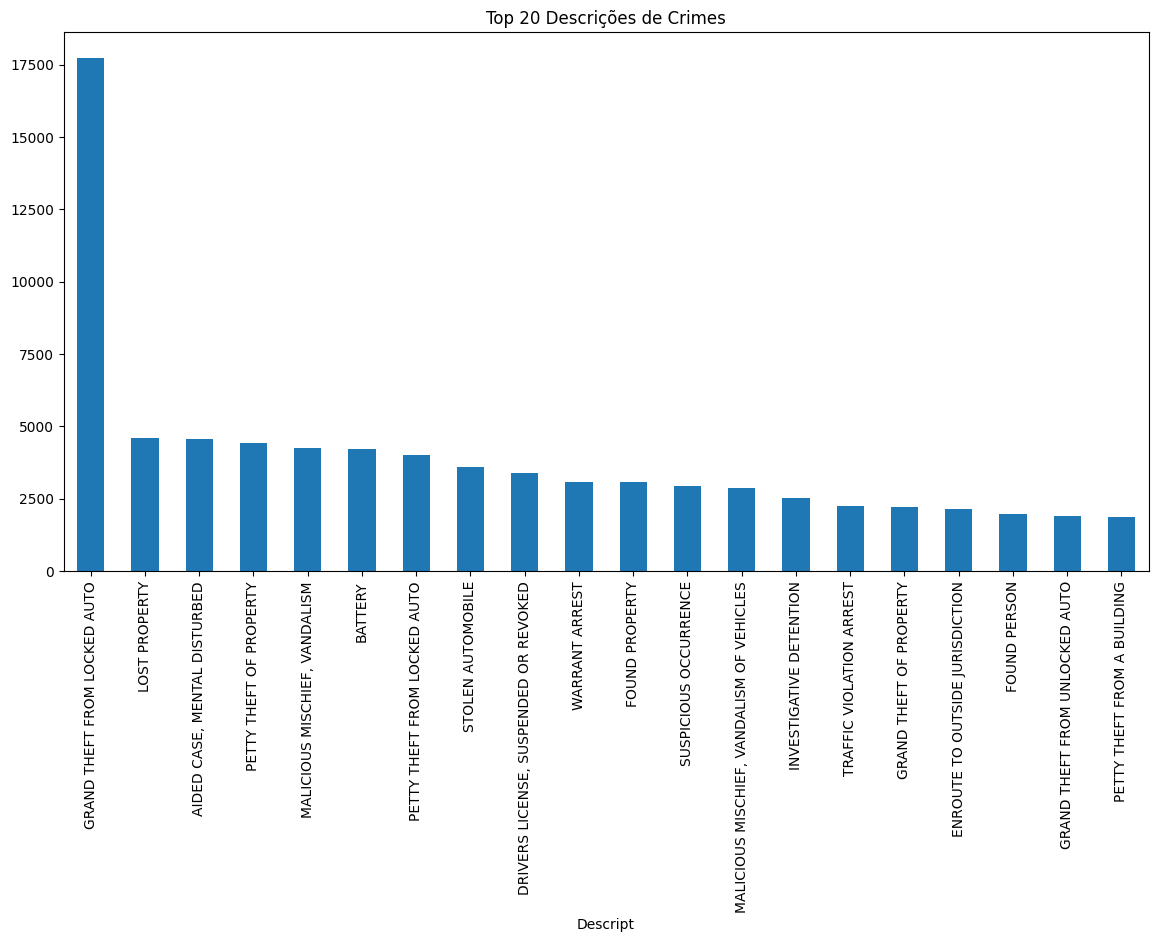

In [25]:
# Contagem das descrições mais comuns
df['Descript'].value_counts().head(20).plot(kind='bar', figsize=(14,7), title='Top 20 Descrições de Crimes');


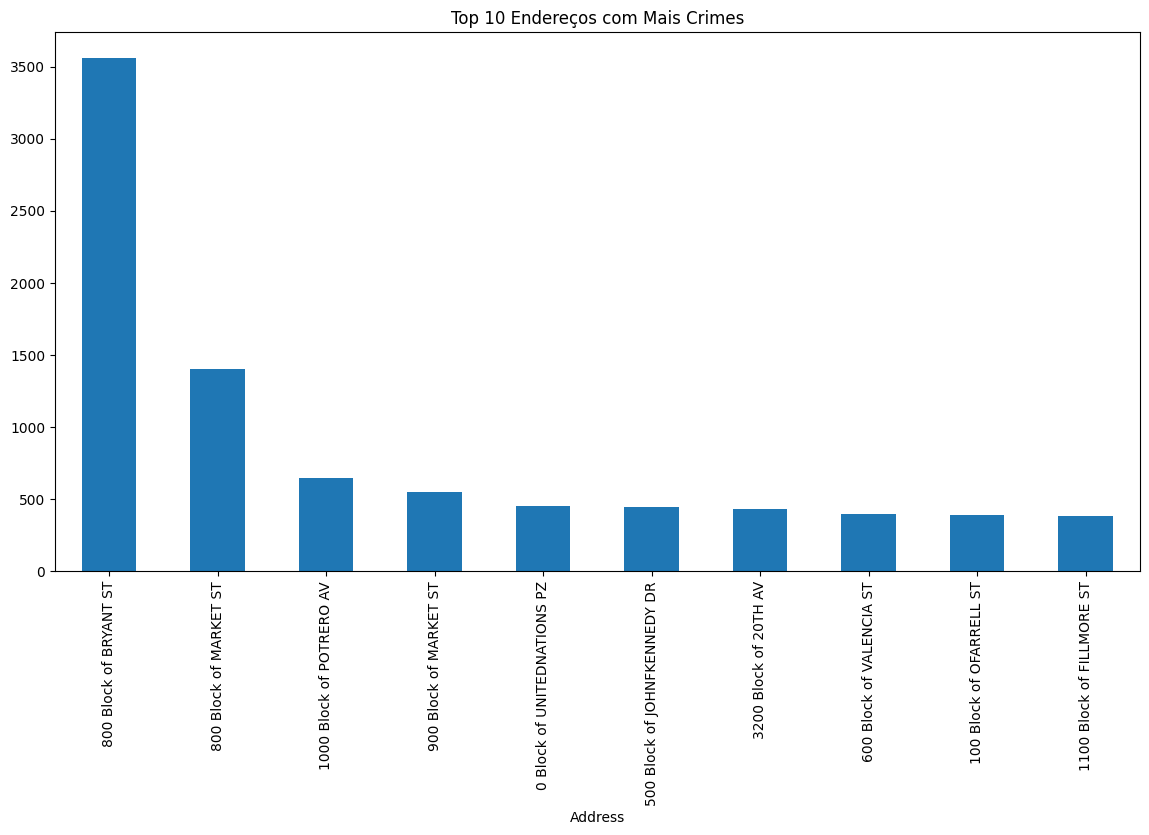

In [27]:
# Contagem dos endereços mais frequentes
df['Address'].value_counts().head(10).plot(kind='bar', figsize=(14,7), title='Top 10 Endereços com Mais Crimes');


In [56]:
# Contagem dos 10 endereços com mais crimes
top_addresses = df['Address'].value_counts().head(10).reset_index()
top_addresses.columns = ['Address', 'Crime_Count']
top_addresses


Address  Crime_Count
0        800 Block of BRYANT ST         3561
1        800 Block of MARKET ST         1405
2      1000 Block of POTRERO AV          644
3        900 Block of MARKET ST          547
4   0 Block of UNITEDNATIONS PZ          452
5  500 Block of JOHNFKENNEDY DR          448
6         3200 Block of 20TH AV          431
7      600 Block of VALENCIA ST          399
8      100 Block of OFARRELL ST          389
9     1100 Block of FILLMORE ST          382

In [55]:
# Contagem de crimes por mês
monthly_crime_counts_df = df.resample('M', on='Date').size().reset_index(name='Crime_Count')
monthly_crime_counts_df.columns = ['Month', 'Crime_Count']
monthly_crime_counts_df



/var/folders/9x/g97__gq54hl2y49fjf8d94rr0000gn/T/ipykernel_57210/3899455060.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crime_counts_df = df.resample('M', on='Date').size().reset_index(name='Crime_Count')


Month  Crime_Count
0  2016-01-31        12946
1  2016-02-29        12092
2  2016-03-31        12362
3  2016-04-30        12317
4  2016-05-31        12713
5  2016-06-30        12076
6  2016-07-31        12166
7  2016-08-31        12428
8  2016-09-30        12473
9  2016-10-31        13331
10 2016-11-30        12670
11 2016-12-31        12926

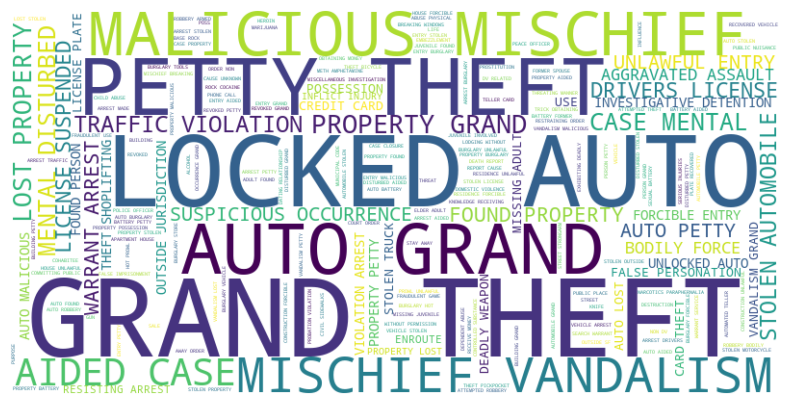

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Descript'].dropna()))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Conclusion and Recommended Actions

Key Findings:
High Crime Concentration in Specific Areas:

The Southern District recorded the highest number of crimes, with 28,445 incidents, highlighting it as a significant hotspot for criminal activity in San Francisco. Similarly, the Northern, Mission, and Central districts also show elevated crime rates.
Specific addresses, such as the 800 Block of BRYANT ST and 800 Block of MARKET ST, emerge as the most crime-ridden locations, indicating areas that require targeted interventions.
Stable Crime Levels Throughout the Year:

Crime rates in San Francisco remained relatively stable throughout 2016, with a slight peak in October. This suggests that crime prevention efforts should be consistent year-round, with potential additional focus during the fall months.
Varied Crime Types Across the City:

Larceny/Theft is the most prevalent crime, accounting for 40,409 incidents, indicating a need for robust anti-theft measures. Other significant categories include Other Offenses and Non-Criminal incidents, which reflect the diverse nature of reported activities and the broader role of law enforcement.
Market Street as a High-Crime Corridor:

The presence of Market Street in the top addresses for crime emphasizes the challenges of managing public safety in busy, commercially active areas. The high pedestrian traffic and economic activities make these areas particularly susceptible to certain crimes, such as theft and vandalism.
Recommended Actions:
Targeted Policing and Resource Allocation:

Focus law enforcement resources on the Southern, Northern, Mission, and Central districts, where crime rates are highest. Increased patrols, surveillance, and community engagement in these areas could help reduce criminal activity.
Special Attention to High-Crime Addresses:

Implement specific safety measures at the most affected addresses, such as the 800 Block of BRYANT ST and 800 Block of MARKET ST. Strategies could include enhanced lighting, security cameras, and increased police presence.
Year-Round Crime Prevention:

Given the stable crime levels throughout the year, maintain consistent crime prevention efforts. However, consider bolstering these efforts in the fall, particularly in October, when crime rates slightly increase.
Anti-Theft Initiatives:

Develop comprehensive anti-theft campaigns targeting both residents and businesses, particularly in areas where larceny/theft is most prevalent. Education, community awareness, and technology-based solutions like smart surveillance could be effective.
Integrated Approaches for Market Street:

Address the unique challenges of Market Street with a combination of law enforcement, urban planning, and community initiatives. Improving public infrastructure, increasing visibility, and engaging with local businesses can help create a safer environment.
Collaboration with Community Organizations:

Work with community groups and local organizations to address underlying social issues that contribute to crime, particularly in districts like Tenderloin. Community policing, outreach programs, and social services can play a vital role in reducing crime in these vulnerable areas.
Final Thoughts:
The analysis underscores the complexity of crime in San Francisco, revealing specific patterns that require tailored approaches. By focusing on high-crime districts and addresses, maintaining consistent preventive efforts, and engaging with the community, San Francisco can make strides in reducing crime and improving public safety across the city. Continuous data analysis and adaptive strategies will be key to effectively addressing the evolving landscape of urban crime.